# Notebook 1: EDA
**Haley Lautenbach**<br>
haley.lautenbach@gmail.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Research Problem:**
There are many movie recommendation systems or streaming services that allow for users to set up a profile. This profile then adds information to the system about what types of films the user does and doesn't like, allowing for the system to make personalized recommendations to the user. However, there doesn't seem to be systems that recommend to more than one user, allowing for couples, families, groups of friends, to have personalized recommendations that take all of their preferences into account. 

The goal of this project is to first build a recommender system that will recommend films to a user, based on their previous ratings. The system will then take into account a second user, and recommend films that both users would enjoy. To solve the above research problem we will be using multiple MovieLens datasets as well as datasets from IMDB. The creation of a user-rating utility matrix will be done with the smaller MovieLens 1M dataset. This matrix will be used for training the models to predict user ratings. The larger MovieLens 20M dataset will be used for the creation of a movie-feature utility matrix. This matrix will be used for calculating movie similarities.

This notebook is 1/4. The contents of this notebook cover the EDA and data pre-processing steps that are involved in the creation of the feature utility matrix. The majority of the notebook was run in Google Colab with the datasets downloaded directly from the source at the time the notebook was last run, April 2, 2021.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-1:-EDA" data-toc-modified-id="Notebook-1:-EDA-1">Notebook 1: EDA</a></span></li><li><span><a href="#Relevant-Packages" data-toc-modified-id="Relevant-Packages-2">Relevant Packages</a></span></li><li><span><a href="#1.-Reading-in-MovieLens-Data" data-toc-modified-id="1.-Reading-in-MovieLens-Data-3">1. Reading in MovieLens Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.1-Movies" data-toc-modified-id="1.1-Movies-3.0.1">1.1 Movies</a></span></li><li><span><a href="#1.2-Tags" data-toc-modified-id="1.2-Tags-3.0.2">1.2 Tags</a></span></li></ul></li></ul></li><li><span><a href="#2.-Changing-Datatypes" data-toc-modified-id="2.-Changing-Datatypes-4">2. Changing Datatypes</a></span><ul class="toc-item"><li><span><a href="#2.1-Movies" data-toc-modified-id="2.1-Movies-4.1">2.1 Movies</a></span></li><li><span><a href="#2.2-Tags" data-toc-modified-id="2.2-Tags-4.2">2.2 Tags</a></span></li></ul></li><li><span><a href="#3.-IMDB-Datasets" data-toc-modified-id="3.-IMDB-Datasets-5">3. IMDB Datasets</a></span><ul class="toc-item"><li><span><a href="#3.1-IMDB-Basics" data-toc-modified-id="3.1-IMDB-Basics-5.1">3.1 IMDB Basics</a></span></li><li><span><a href="#3.2-IMDB-Ratings" data-toc-modified-id="3.2-IMDB-Ratings-5.2">3.2 IMDB Ratings</a></span></li><li><span><a href="#3.3-IMDB-Crew" data-toc-modified-id="3.3-IMDB-Crew-5.3">3.3 IMDB Crew</a></span></li><li><span><a href="#3.4-IMDB-Names" data-toc-modified-id="3.4-IMDB-Names-5.4">3.4 IMDB Names</a></span></li></ul></li><li><span><a href="#4.-Vectorization-of-MovieLens-Dataframes" data-toc-modified-id="4.-Vectorization-of-MovieLens-Dataframes-6">4. Vectorization of MovieLens Dataframes</a></span><ul class="toc-item"><li><span><a href="#4.1-Movies" data-toc-modified-id="4.1-Movies-6.1">4.1 Movies</a></span><ul class="toc-item"><li><span><a href="#4.1.1-title" data-toc-modified-id="4.1.1-title-6.1.1">4.1.1 <code>title</code></a></span></li><li><span><a href="#4.1.2-Ohe-year_of_release" data-toc-modified-id="4.1.2-Ohe-year_of_release-6.1.2">4.1.2 Ohe <code>year_of_release</code></a></span></li><li><span><a href="#4.1.3-genres" data-toc-modified-id="4.1.3-genres-6.1.3">4.1.3 <code>genres</code></a></span></li><li><span><a href="#4.1.4-Merging-Transformations-with-Original-Dataframe" data-toc-modified-id="4.1.4-Merging-Transformations-with-Original-Dataframe-6.1.4">4.1.4 Merging Transformations with Original Dataframe</a></span></li><li><span><a href="#4.1.5-Formation-of-Utility-Matrix" data-toc-modified-id="4.1.5-Formation-of-Utility-Matrix-6.1.5">4.1.5 Formation of Utility Matrix</a></span></li></ul></li><li><span><a href="#4.2-Tags" data-toc-modified-id="4.2-Tags-6.2">4.2 Tags</a></span><ul class="toc-item"><li><span><a href="#4.2.1-Checking-unique-tags" data-toc-modified-id="4.2.1-Checking-unique-tags-6.2.1">4.2.1 Checking unique <code>tags</code></a></span></li><li><span><a href="#4.2.2-Normalizing-case-setting" data-toc-modified-id="4.2.2-Normalizing-case-setting-6.2.2">4.2.2 Normalizing case setting</a></span></li><li><span><a href="#4.2.3-Condensing-Tags" data-toc-modified-id="4.2.3-Condensing-Tags-6.2.3">4.2.3 Condensing Tags</a></span></li><li><span><a href="#4.2.4-Encoding-tags" data-toc-modified-id="4.2.4-Encoding-tags-6.2.4">4.2.4 Encoding tags</a></span></li><li><span><a href="#4.2.5-Merging-encoded-tags-with-the-Movie-ID" data-toc-modified-id="4.2.5-Merging-encoded-tags-with-the-Movie-ID-6.2.5">4.2.5 Merging encoded tags with the Movie ID</a></span></li></ul></li></ul></li><li><span><a href="#5.-Vectorization-of-IMDB-Dataframes" data-toc-modified-id="5.-Vectorization-of-IMDB-Dataframes-7">5. Vectorization of IMDB Dataframes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#5.1-directors-&amp;-writers" data-toc-modified-id="5.1-directors-&amp;-writers-7.0.1">5.1 <code>directors</code> &amp; <code>writers</code></a></span></li><li><span><a href="#5.2-Creation-of-Feature-Matrix" data-toc-modified-id="5.2-Creation-of-Feature-Matrix-7.0.2">5.2 Creation of Feature Matrix</a></span></li><li><span><a href="#5.3-Merging-Names-with-nconst" data-toc-modified-id="5.3-Merging-Names-with-nconst-7.0.3">5.3 Merging Names with nconst</a></span></li><li><span><a href="#5.4-titleType" data-toc-modified-id="5.4-titleType-7.0.4">5.4 <code>titleType</code></a></span></li></ul></li></ul></li><li><span><a href="#6.-Creation-of-Movie-Reference-Table" data-toc-modified-id="6.-Creation-of-Movie-Reference-Table-8">6. Creation of Movie Reference Table</a></span></li></ul></div>

# Relevant Packages

In [5]:
# for datset manipulation
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model pre-processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

# 1. Reading in MovieLens Data

Datasets taken from the GroupLens [website](https://grouplens.org/datasets/movielens/20m/).

In [90]:
# reading in the movies dataset
movies = pd.read_csv('/content/ml-20m/movies.csv')

In [3]:
# reading in the tags dataset
tags = pd.read_csv('/content/ml-20m/tags.csv')

### 1.1 Movies

In [4]:
# checking shape
print(movies.shape)
movies.head()

(27278, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The movies dataset has 27,278 rows (movies) and three columns (movieId, title and genres). It also looks as though the year the film was released is embedded in the title.

In [5]:
# checking for null values
movies.isna().any()

movieId    False
title      False
genres     False
dtype: bool

There seems to be no null values in any of the columns.

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


**Columns in the movies dataset:**
- `movieId`: individual IDs of the movies, integer. This column would be better represented as categorical, since we will not be preforming any calculations on the IDs, it is not necessary to have them represented as integers.
- `title`: the title of the movie, categorical. This column has the title and then the year of release after it. We can pull out the year of release into it's own separate column to discover whether the ratings for a movie change over time, or if certain users have a preference as to the release date of a film.
- `genres`: the genres associated with the movie, categorical. This column is represented by a list of genres that the movie would fall under, with varying numbers of genres across all the films. This column will also require some pre-processing, since the list separator is a special character. I imagine for the formation of a utility matrix, we will be one hot encoding the genres after separating them out.

### 1.2 Tags

In [7]:
# checking shape
print(tags.shape)
tags.head()

(465564, 4)


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


There are 465,564 rows (tags) in the tags dataset and 4 columns (userId, movieId, tag and timestamp).

In [8]:
# checking for nulls
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

It seems there are null values in the tag column of this dataset. Seeing as the tags is the main information we are looking for in this dataset, we will be dropping the rows that have null values in this column.

In [9]:
# dropping the null value rows
tags.dropna(axis=0, inplace=True)

In [10]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465548 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465548 non-null  int64 
 1   movieId    465548 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465548 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ MB


**Columns in the tags datset:**
- `userId`: the id of the user that logged the tag, integer. This column again, is better represented as an object. This is also the same userId that is in the ratings dataset.
- `movieId`: the id of the movie the tag is associated with, integer. We will be changing this to object as well.
- `tag`: the tag that the user assigned, object. This column is the proper datatype, it will be interesting to see how many unique values are in this column, since the tags are user produced and not of a standard format or from a list of well-known tags.
- `timestamp`: the timestamp that the tag was assigned. This column is also represented as a UTC timestamp which we will most likely be changing to datetime instead. It will be interesting to see if the tags that are assigned to a film change over the years, as a movie's public perception changes over time.

# 2. Changing Datatypes

## 2.1 Movies

We will now be changing the datatype for the movieId column from integer to object, as outlined previously.

In [91]:
# creating a copy of the original for the EDA
movies_df = movies.copy()

In [92]:
# changing the datatype of movieId
movies_df['movieId'] = movies_df['movieId'].astype(dtype='object')

In [93]:
# sanity check 
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  object
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: object(3)
memory usage: 639.5+ KB


## 2.2 Tags

We will now be changing the datatypes of the userId and movieId columns from integer to object, as outlined previously.

In [14]:
# creation of a copy of the datset for EDA
tags_df = tags.copy()

In [15]:
# changing userId & movieId from integer to object
tags_df[['userId', 'movieId']] = tags_df[['userId', 'movieId']].astype(dtype='object')

In [16]:
# changing the timestamp from UNIX to datetime
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s') # units for UNIX in seconds

In [17]:
# sanity check
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465548 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     465548 non-null  object        
 1   movieId    465548 non-null  object        
 2   tag        465548 non-null  object        
 3   timestamp  465548 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 17.8+ MB


Now that the datatypes have been set, we can continute.

# 3. IMDB Datasets

We will be using the IMDB Datasets for supplementary information, such as filling in Nan values or addition of features not included in our main MovieLens datasets. Since the MovieLens [datasets](https://grouplens.org/datasets/movielens/latest/)  provides a link key table, linking up based on movie ids should be relatively easy.

In [18]:
# reading in links dataset from the Movie-lens latest dataset
link_key_df = pd.read_csv('/content/ml-latest/links.csv')

In [19]:
# checking info on dataset
link_key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  58098 non-null  int64  
 1   imdbId   58098 non-null  int64  
 2   tmdbId   57917 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


The link-key table has 58098 rows (movies) and 3 columns (movieId, imdbId, tmdbId).

In [20]:
link_key_df.isna().sum()

movieId      0
imdbId       0
tmdbId     181
dtype: int64

The only columns that have null values is `tmdbId`. Since we will not be using any data from TMDB we will just be dropping the column. 

In [21]:
# dropping the tmdbId column
link_key_df.drop('tmdbId', axis=1, inplace=True)

In [22]:
link_key_df.head()

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


Now the link-key table is ready for linking movieIds to the IMDB movie Ids.

## 3.1 IMDB Basics

The first IMDB table that we will be reading in is the [IMDB](https://datasets.imdbws.com/) basics table.

In [23]:
# reading in the IMDB basics table, it is a tab separated file so you have to specify delimiter 't' for tab
imdb_basics = pd.read_csv('/content/title.basics.tsv', delimiter="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
imdb_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7770802,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7770803,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7770804,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7770805,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


For the basics table, we are most interested in the `isAdult`, `startYear` and `runtimeMinutes` columns. We already have a genres column in our MovieLens dataset, and we do not want any repeats of columns. However, we may near the startYear column to fill in Null values since we do not know at the moment whether we will be able to pull the year of release off of every title in the list. It also looks as though the id column in the IMDB datasets is formatted differently than in our MovieLens datasets.

In [25]:
# dropping unwanted columns
imdb_basics.drop(columns=['originalTitle', 'endYear', 'genres'], inplace=True)

In [26]:
imdb_basics.shape

(7770807, 6)

The IMDB basics table now has 7,770,807 rows and 6 columns. We will only need about 27,000 of these rows so we will be able to slim this down considerably.

In [27]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770807 entries, 0 to 7770806
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   isAdult         object
 4   startYear       object
 5   runtimeMinutes  object
dtypes: object(6)
memory usage: 355.7+ MB


The only column that is represented by an inappropriate datatype is the runtimeMinutes column. This column should be represented as an integer, so we will be changing it to that before it is added to the final utility matrix.

In [28]:
# checking how many null values per column
imdb_basics.isna().sum()

tconst             0
titleType          0
primaryTitle      11
isAdult            0
startYear          0
runtimeMinutes     0
dtype: int64

Of the 7770807 rows, 11 rows are very inconsequential and most likely not included in our small list of 27,278 films, so we will be dropping them.

In [29]:
# dropping rows with null values
imdb_basics.dropna(axis=0, inplace=True)

In [30]:
# sanity check
imdb_basics.shape

(7770796, 6)

Before we go about formatting the tconst to match with the imdbId, we should make sure that the codes for the Movielens dataset actually do match the imdb dataset. To check, we will use Toy Story, which in the MovieLens is #1 or imdbId #114709.

In [31]:
# sanity check
imdb_basics[imdb_basics['tconst'].str.contains('114709$')]

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes
112196,tt0114709,movie,Toy Story,0,1995,81
1624497,tt1114709,tvMovie,Armuke,0,2000,29
4115750,tt2114709,tvEpisode,Ganba Goes Nuts Onboard,0,1975,\N


It looks like the tconst and imdbId are the same for Toy Story, they're just in very different formats. To be able to merge the dataframes together on that key, we will have to do some formatting first. It seems the tconst starts every key with tt and then fills in the empty space between the tt and the id code with zeroes so that all of the tconst ids are the same length. The imdbId in our MovieLens link dataframe does not do that.

First we need to decide which id we're going to make match the other. I think it would be easiest and probably more effective to remove the leading t's and leading zeroes from the tconst in the IMDB dataset, so this is where we will start. I imagine a regex expression denoting the t's and then changing the column datatype to integer will do the trick.

In [32]:
# strips off the double t at the start
imdb_basics['tconst'] = imdb_basics['tconst'].str.lstrip(to_strip=r'(^(?:tt))')

In [33]:
# sanity check
imdb_basics.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes
0,0000001,short,Carmencita,0,1894,1
1,0000002,short,Le clown et ses chiens,0,1892,5
2,0000003,short,Pauvre Pierrot,0,1892,4
3,0000004,short,Un bon bock,0,1892,12
4,0000005,short,Blacksmith Scene,0,1893,1


In [34]:
# sanity check
imdb_basics.tail()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes
7770802,9916848,tvEpisode,Episode #3.17,0,2010,\N
7770803,9916850,tvEpisode,Episode #3.19,0,2010,\N
7770804,9916852,tvEpisode,Episode #3.20,0,2010,\N
7770805,9916856,short,The Wind,0,2015,27
7770806,9916880,tvEpisode,Horrid Henry Knows It All,0,2014,10


In [35]:
# sanity check
imdb_basics['tconst'].nunique()

7770796

We have successfully removed all of the double t's and kept the same number of unique values as before, which means there are no formatting errors. Instead of removing the leading zeroes from the strings, we will just convert the column to integer at the step, which will remove the leading zeroes for us. 

In [36]:
# changing the dataype of the column
imdb_basics['tconst'] = imdb_basics['tconst'].astype(int)

In [37]:
# sanity check 
imdb_basics.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes
0,1,short,Carmencita,0,1894,1
1,2,short,Le clown et ses chiens,0,1892,5
2,3,short,Pauvre Pierrot,0,1892,4
3,4,short,Un bon bock,0,1892,12
4,5,short,Blacksmith Scene,0,1893,1


In [38]:
# sanity check
imdb_basics.tail()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes
7770802,9916848,tvEpisode,Episode #3.17,0,2010,\N
7770803,9916850,tvEpisode,Episode #3.19,0,2010,\N
7770804,9916852,tvEpisode,Episode #3.20,0,2010,\N
7770805,9916856,short,The Wind,0,2015,27
7770806,9916880,tvEpisode,Horrid Henry Knows It All,0,2014,10


In [39]:
# sanity check
imdb_basics['tconst'].nunique()

7770796

Now that we've stripped off the unwanted characters and converted the column to it's proper datatype, we can merge with the link table and bring in the movieIds.

In [40]:
# changing the name of the column for merge purposes
imdb_basics.rename(columns={'tconst': 'imdbId'}, inplace=True)

We will now link this imdb table with the ids from the MovieLens dataset. Using an inner join we will be able to drop all of the rows that do not occur in both datasets, meaning we will only be keeping the information for movies that we have in our MovieLens dataset.

In [41]:
# merging tables to bring in the movieId
imdb_basics = pd.merge(imdb_basics, link_key_df, on='imdbId', how='inner')

In [42]:
imdb_basics.sort_values('movieId')

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId
21910,114709,movie,Toy Story,0,1995,81,1
21635,113497,movie,Jumanji,0,1995,104,2
21570,113228,movie,Grumpier Old Men,0,1995,101,3
21952,114885,movie,Waiting to Exhale,0,1995,124,4
21516,113041,movie,Father of the Bride Part II,0,1995,106,5
...,...,...,...,...,...,...,...
3975,38566,movie,The Great Glinka,0,1946,116,193876
43807,1754787,movie,Les tribulations d'une caissière,0,2011,102,193878
56209,5847740,movie,Eyo zvali Mumu,0,2016,96,193880
53640,4453756,movie,Flora,0,2017,105,193882


Before moving on from this point, we will change the datatype of the column `runtimeMinutes` to integer. While there are no obvious null values, some rows have been filled with "\N". Since we do not want to lose the other information related to these films by dropping these rows, we will impute the data with the average of the column. Before doing so, the column has to be transformed to an integer and to do this, we must change the value of the "\N" rows to null values. We will then convert the column to a float, since NumPy NaNs cannot be converted to an integer, so we can find the mean value of the runtime minutes. Once we have the mean, we can fill in the Nan values and change the column to integer.

In [43]:
# changing \N values to np.nan
imdb_basics.loc[imdb_basics['runtimeMinutes'] == "\\N", 'runtimeMinutes'] = np.nan

In [44]:
# changing datatype of column to float
imdb_basics['runtimeMinutes'] = imdb_basics['runtimeMinutes'].astype(dtype='float')

In [45]:
imdb_basics.describe()

,imdbId,runtimeMinutes,movieId
count,5.801200e+04,57729.000000,58012.000000
mean,1.191101e+06,95.781063,111920.374509
std,1.700338e+06,34.325707,59861.470220
min,1.000000e+00,0.000000,1.000000
25%,8.046475e+04,85.000000,72465.250000
50%,2.901850e+05,94.000000,126547.000000
75%,1.722456e+06,106.000000,161440.500000
max,9.038520e+06,1256.000000,193886.000000


The average runtime minutes for the movies is 95.77 minutes. We will be changing the runtime for the nan values to 95 minutes. Since the majority of the distribution lies in between 85-100 minutes, this change will not make a significant difference to the overall disribution of the data. There also seems to be some outliers in this column that might have to be dealt with to continue.

In [46]:
# filling nan values
imdb_basics['runtimeMinutes'] = imdb_basics['runtimeMinutes'].fillna(value=95, axis=0)

In [47]:
# sanity check
imdb_basics.isna().sum()

imdbId            0
titleType         0
primaryTitle      0
isAdult           0
startYear         0
runtimeMinutes    0
movieId           0
dtype: int64

In [48]:
# changing to integer
imdb_basics['runtimeMinutes'] = imdb_basics['runtimeMinutes'].astype(dtype='int')

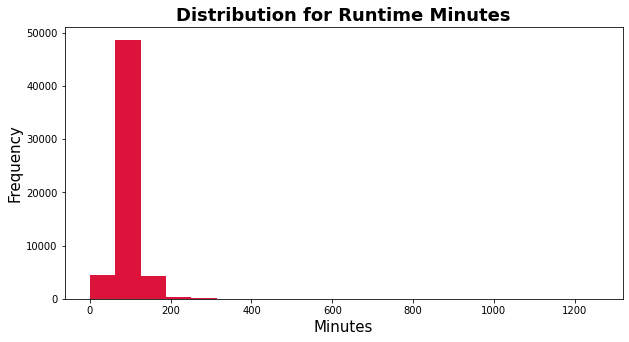

In [49]:
plt.figure(figsize=(10,5))
plt.hist(imdb_basics['runtimeMinutes'], bins=20, color='crimson')
plt.title('Distribution for Runtime Minutes', fontsize=18, fontweight=700)
plt.xlabel('Minutes', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

The histogram distribution shows the majority of the data lies in between 50-200 minutes. These outliers show that the data includes video shorts under 30 minutes as well as tv series where the runtimes can be up to ~1200 min for the entire series. For this recommendation engine, we will be focusing on movies in particular, so we will be dropping any row that corresponds with a tv series or a tv short.

In [50]:
imdb_basics[imdb_basics['runtimeMinutes'] > 700]

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId
13678,76993,tvMiniSeries,Centennial,0,1978,1256,114382
14456,80196,tvMiniSeries,Berlin Alexanderplatz,0,1980,931,69241
14857,81846,tvMiniSeries,Cosmos,0,1980,780,171495
15615,85077,tvMiniSeries,Reilly: Ace of Spies,0,1983,720,147120
16155,87400,tvMiniSeries,Heimat: A Chronicle of Germany,0,1984,924,70186
16400,88611,tvMiniSeries,Space,0,1985,780,123621
20699,108700,tvMiniSeries,Baseball,0,1994,1140,165069
27545,246135,movie,Out 1,0,1971,776,187263
28989,289830,tvMiniSeries,Taken,0,2002,877,123288
30326,337898,tvMiniSeries,Law of the Lawless,0,2002,750,93490


In [51]:
imdb_basics['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvEpisode', 'tvShort', 'tvSeries',
       'tvMiniSeries', 'video', 'tvSpecial'], dtype=object)

The title type column has 9 different types, of which only 4 types actually correspond with films. For our purposes, we will be dropping anything that corresponds with tv, except for tvMovie, which may just mean a movie that went straight to tv.

In [52]:
# dropping rows where the title type is tvEpisode
imdb_basics.drop(imdb_basics[imdb_basics['titleType'] == 'tvEpisode'].index, axis=0, inplace=True)

In [53]:
# dropping columns where the title type is tvSeries, tvMiniSeries, tvSpecial and tvShort
types_to_drop = ['tvSeries', 'tvMiniSeries', 'tvSpecial', 'tvShort']

for type in types_to_drop:
    imdb_basics.drop(imdb_basics[imdb_basics['titleType'] == type].index, axis=0, inplace=True)

In [54]:
imdb_basics['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'video'], dtype=object)

To control for our outliers, we will not be including short films that are under 15 minutes long or films that are longer than 240 minutes.

In [55]:
imdb_basics.drop(imdb_basics[imdb_basics['runtimeMinutes'] < 15].index, axis=0, inplace=True)
imdb_basics.drop(imdb_basics[imdb_basics['runtimeMinutes'] > 240].index, axis=0, inplace=True)

In [56]:
imdb_basics.shape

(55052, 7)

The final size of the dataframe is 55,052 rows and 7 columns. 

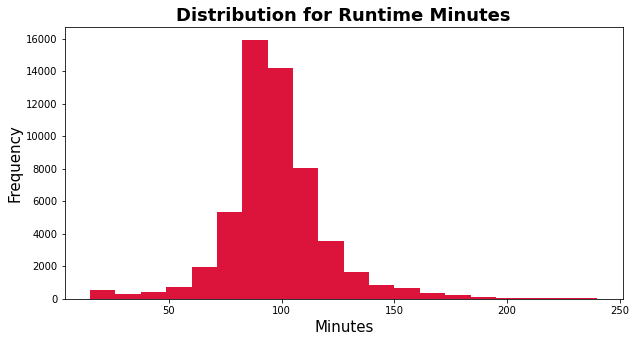

In [57]:
plt.figure(figsize=(10,5))
plt.hist(imdb_basics['runtimeMinutes'], bins=20, color='crimson')
plt.title('Distribution for Runtime Minutes', fontsize=18, fontweight=700)
plt.xlabel('Minutes', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [58]:
# for safekeeping
imdb_basics.to_csv('/content/imdb_basics.csv')

We can now use this table as a base for our IMDB features table.

## 3.2 IMDB Ratings

This table holds the average IMDB rating for each movie, as well as the number of votes that each movie has. These columns will help us gauge "popular" movies, which will be useful when recommending movies to users that we do not have any information on.

In [59]:
imdb_ratings = pd.read_csv('/content/title.ratings.tsv', sep='\t')

In [60]:
imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1695
1,tt0000002,6.0,210
2,tt0000003,6.5,1442
3,tt0000004,6.1,122
4,tt0000005,6.1,2242


In [61]:
imdb_ratings.shape

(1135764, 3)

In [62]:
imdb_ratings.isna().any()

tconst           False
averageRating    False
numVotes         False
dtype: bool

The imdb_ratings table has 1,135,764 rows and 3 columns. The columns being the tconst (imdbId), the average rating and the number of votes. It also does not seem to have any null values.

We will use the same formatting steps as before to fix the tconst column in this table as well.

In [63]:
# stripping the double t's and changing the datatype
imdb_ratings['tconst'] = imdb_ratings['tconst'].str.lstrip(to_strip=r'(^(?:tt))')
imdb_ratings['tconst'] = imdb_ratings['tconst'].astype(int)

In [64]:
# sanity check
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135764 entries, 0 to 1135763
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1135764 non-null  int64  
 1   averageRating  1135764 non-null  float64
 2   numVotes       1135764 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 26.0 MB


In [65]:
# renaming the id column from tconst to imdbId
imdb_ratings.rename(columns={'tconst': 'imdbId'}, inplace=True)

In [66]:
# merging with the imdb_basics table
imdb_features = pd.merge(imdb_basics, imdb_ratings, on='imdbId', how='left')

In [67]:
imdb_features.head()

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141.0
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284.0
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206.0
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971.0
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625.0


We have succesfully merged the `imdb_ratings` table to the `imdb_basics` table, under a new name `imdb_features`.

In [68]:
# sanity check
imdb_features.isna().sum()

imdbId             0
titleType          0
primaryTitle       0
isAdult            0
startYear          0
runtimeMinutes     0
movieId            0
averageRating     69
numVotes          69
dtype: int64

At this point we can see that we have 69 movies with no average rating from IMDB and no number of votes. Since we will be using these measurements for threshold values for our recommendations, we can deal with these null values in a similar way that we dealt with the nulls from `runtime minutes` before. We will find the average values for each and inpute into the missing fields in the dataframe.

In [69]:
imdb_features.describe().T

,count,mean,std,min,25%,50%,75%,max
imdbId,55052.0,1.170643e+06,1.675399e+06,192.0,79963.25,284484.0,1699568.5,8916694.0
runtimeMinutes,55052.0,9.707344e+01,2.272183e+01,15.0,87.00,95.0,106.0,240.0
movieId,55052.0,1.098118e+05,6.007303e+04,1.0,69479.50,124421.0,159249.5,193886.0
averageRating,54983.0,6.221079e+00,1.147875e+00,1.1,5.60,6.4,7.0,9.6
numVotes,54983.0,1.492589e+04,6.817617e+04,5.0,395.00,1189.0,4474.5,2369695.0


We will be going with the median values for the `averageRating` and `numVotes` column, 6.4 and 1189.0, respectively. We do not want to have these values be too low, just in case the movies they are representing are of quality. We also do not want to impute values that are too high, giving more weight to movies that we do not have actual valid data for. 
We will also be changing the datatype of the column `numVotes` to integer, it is not necessary to have it as a float since there will not be any partial vote values.

In [70]:
# imputing values
imdb_features['averageRating'] = imdb_features['averageRating'].fillna(value=6.4, axis=0)
imdb_features['numVotes'] = imdb_features['numVotes'].fillna(value=1189, axis=0)

In [71]:
# sanity check
imdb_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55052 entries, 0 to 55051
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdbId          55052 non-null  int64  
 1   titleType       55052 non-null  object 
 2   primaryTitle    55052 non-null  object 
 3   isAdult         55052 non-null  object 
 4   startYear       55052 non-null  object 
 5   runtimeMinutes  55052 non-null  int64  
 6   movieId         55052 non-null  int64  
 7   averageRating   55052 non-null  float64
 8   numVotes        55052 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.2+ MB


There are now no null values in the dataset.

In [72]:
# changing datatype to integer
imdb_features['numVotes'] = imdb_features['numVotes'].astype(dtype=int)

In [73]:
# sanity check
imdb_features.shape

(55052, 9)

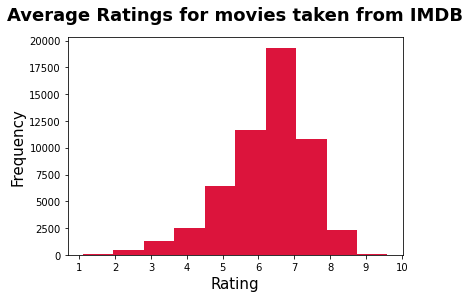

In [74]:
plt.figure()
plt.hist(imdb_features['averageRating'], bins=10, color='crimson')
plt.xticks(range(1,11))
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.title('Average Ratings for movies taken from IMDB', fontsize=18, fontweight=700, y=1.05)
plt.show()

It looks like most of the movies get an average rating betwen 6 and 8, with most of the movies rating above a 5 in general. This distribution will be helpful in the future when choosing a threshold for what is considered "popular", so we aren't recommending movies that are obscure. We can probably choose our threshold to be anything above an average rating of 6 as an acceptable choice for a recommendation to a user we know nothing about. 

## 3.3 IMDB Crew

The crew table lists the directors and writers assocatiated with the movies. These columns will be useful for judging similarities between films as well as a useful feature for determining whether a user prefers films that have certain people involved with them.

In [75]:
# reading in the crew data
imdb_crew = pd.read_csv('/content/title.crew.tsv', sep='\t')

In [76]:
# checking shape
imdb_crew.shape

(7770807, 3)

The crew table has 7,770,807 rows and 3 columns. It's good sign that the number of rows in this table matches with the original IMDB Basics table, which means all movies presented in the basics dataset are accounted for in this dataset as well.

In [77]:
imdb_crew.head(10)

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
5,tt0000006,nm0005690,\N
6,tt0000007,"nm0374658,nm0005690",\N
7,tt0000008,nm0005690,\N
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,\N


It looks like the directors and writers columns are actually a list of name ids, and that null values are represented as \N instead of an acutal Nan value. These ids will have to be pulled out and vectorized in some way, either one-hot encoding or count vectorizing, and then the column headers will have to be renamed with the actual name of the person. The null values will most likely end up being vectorized as well, and then the column headers that have \N in them will have to be dropped.

Before handling any of the vectorization, we will first be stripping the t's from the beginning of the tconst column, changing the column to integer and then merging with the features table in the same way as before.

In [78]:
# the same tconst formatting as before
imdb_crew['tconst'] = imdb_crew['tconst'].str.lstrip(to_strip=r'(^(?:tt))')
imdb_crew['tconst'] = imdb_crew['tconst'].astype(int)

In [79]:
# renaming column to match 
imdb_crew.rename(columns={'tconst':'imdbId'}, inplace=True)

In [80]:
# merging the crew table with the features table
imdb_features = pd.merge(imdb_features, imdb_crew, on='imdbId', how='left')

In [81]:
# sanity check
imdb_features.shape

(55052, 11)

In [82]:
# sanity check
imdb_features.isna().sum()

imdbId            0
titleType         0
primaryTitle      0
isAdult           0
startYear         0
runtimeMinutes    0
movieId           0
averageRating     0
numVotes          0
directors         0
writers           0
dtype: int64

In [83]:
imdb_features.head()

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes,directors,writers
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141,nm0924920,nm0238900
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284,nm0617588,"nm0617588,nm1340310"
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206,nm0617588,"nm0617588,nm0894523,nm0257866"
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971,nm0617588,"nm0182945,nm9551905"
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625,nm0846879,nm0846879


At this point, the table is ready to have the columns be vectorized and put into a form that can be merged into the final feature utility matrix.

In [84]:
# for safekeeping
imdb_features.to_csv('/content/imdb_features.csv')

## 3.4 IMDB Names

To be able to de-encode the names for the writers and directors, we will also need the IMDB names table. We will use this to match up actual names to the "nconst" name ids from the IMDB crew.

In [6]:
# reading in data
imdb_names = pd.read_csv('/content/name.basics.tsv', sep='\t')

In [7]:
# checking shape
imdb_names.shape

(10827583, 6)

This dataset has 10,827,583 rows and 6 columns. The columns include the id columns (nconst), the name of the person, their birth year, death year, primary profession and a selection of titles they are known for. 

In [8]:
imdb_names

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0050976,tt0050986,tt0060827"
...,...,...,...,...,...,...
10827578,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10827579,nm9993716,Essias Loberg,\N,\N,NaN,\N
10827580,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10827581,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


From the IMDB names table, we need the names for the directors and the writers to match up with the IMDB crew table. However, we are also interested in the actors from the names table. There is a column in this table called `knownforTitles`, this seems to be a collection of movies that the actor/writer/director/etc. is known for. However, it also seems as though there is only a max of 4 movies allowed in this section. Technically, we could just use this second table for the names of the actors/writers/directors that are associated with each film, but we do not know what is meant by "known for" and why the list is capped at 4. It could be possible that a writer or director is involved with a film, but that is not a film that they are known for, so it would not show up in this list. But, that name would show up in the fields of director/writer in the table previous IMDB Crew. It does seem that to make sure we have all potential avenues covered, we should include information from both the crew table as well as the `knownforTitles` column in this table.

We know for sure that we have no interest in the `birthYear`, `deathYear` or `primaryProfession` of the people involved so those columns will be dropped at this stage.

In [9]:
# dropping columns
imdb_names.drop(columns=['birthYear', 'deathYear', 'primaryProfession'], axis=1, inplace=True)

In [10]:
# for safekeeping
imdb_names.to_csv('/content/imdb_names.csv')

At this point there is no further formatting to be done until we are vectorizing the columns in the crew table as well.

# 4. Vectorization of MovieLens Dataframes

For the feature utility matrix, each row must be one movie and each column must be a "feature" of that film, be it the genre, writer, director, tag, etc. The column values are binary, either a 1 or 0, to indicate that that film does have that feature. To create this matrix, the columns we have in our MovieLens and IMDB datasets will have to be vectorized and then merged back to the original movie Ids.

## 4.1 Movies
### 4.1.1 `title`

To transform the `title` column, we will first need to pull the year of release out of the 'title' string in each row. We will do so using the str.extract() method, specifying that we extract only sections of the string which follow a certain pattern, for ex. (1111). The regular expression "[(][0-9]{4}[)]" denotes that there are exactly 4 digits in between 0-9, which are enclosed in a set of round brackets.<br>
After pulling the year out, we can then remove that section of the string from each title. We can then use one-hot encoding on the `year_of_release` column, putting the years into a format more suited for the feature matrix.

In [94]:
# pulling the year of release out of the title column
# regular expression denotes specifically 4 digits within parentheses
movies_df['year_of_release'] = movies_df['title'].str.extract(pat=r"([(][0-9]{4}[)])")

In [95]:
# all unique values for the year of release
movies_df['year_of_release'].unique()

array(['(1995)', '(1994)', '(1996)', '(1976)', '(1992)', '(1988)',
       '(1967)', '(1993)', '(1964)', '(1977)', '(1965)', '(1982)',
       '(1985)', '(1990)', '(1991)', '(1989)', '(1937)', '(1940)',
       '(1969)', '(1981)', '(1973)', '(1970)', '(1960)', '(1955)',
       '(1959)', '(1968)', '(1980)', '(1975)', '(1986)', '(1948)',
       '(1943)', '(1950)', '(1946)', '(1987)', '(1997)', '(1974)',
       '(1956)', '(1958)', '(1949)', '(1972)', '(1998)', '(1933)',
       '(1952)', '(1951)', '(1957)', '(1961)', '(1954)', '(1934)',
       '(1944)', '(1963)', '(1942)', '(1941)', '(1953)', '(1939)',
       '(1947)', '(1945)', '(1938)', '(1935)', '(1936)', '(1926)',
       '(1932)', '(1979)', '(1971)', '(1978)', '(1966)', '(1962)',
       '(1983)', '(1984)', '(1931)', '(1922)', '(1999)', '(1927)',
       '(1929)', '(1930)', '(1928)', '(1925)', '(1914)', '(2000)',
       '(1919)', '(1923)', '(1920)', '(1918)', '(1921)', '(2001)',
       '(1924)', '(2002)', '(2003)', '(1915)', '(2004)', '(191

As we can see above, there seems to be some Nan's in the new column where the extract method could not find a year of release. Because we plan on one-hot encoding this column later, we will be dropped the resulting `nan` column instead of dropping the rows that do not have a year of release associated with them. It is possible that these films have other important information that will be useful for modelling, or that we can fill these nan values with the year of release from the IMDB datasets.

Before one-hot encoding, we will be removing the brackets around the years and attempting to fill the null values.

In [96]:
# removing the brackets from the year_of_release column
movies_df['year_of_release'] = movies_df['year_of_release'].str.replace(pat=r"\D", repl="")

In [97]:
# checking to see how many nans are in the dataframe
print("Nan count:")
print(movies_df['year_of_release'].isna().sum())

Nan count:
22


First, we need to figure out which rows have the null values in them.

In [98]:
# checking which rows have the nan values
movieId_year_nans_list = list(movies_df['movieId'][movies_df['year_of_release'].isna()])
movieId_year_nans_list

[40697,
 79607,
 87442,
 107434,
 108548,
 108583,
 112406,
 113190,
 115133,
 115685,
 125571,
 125632,
 125958,
 126438,
 126929,
 127005,
 128612,
 128734,
 129651,
 129705,
 129887,
 130454]

Now that we have the list of movieIds that have null values in the associated year of release column, we can source year of release from the IMDB table. We have set up a try and except clause in the loop, where if the IMDB table does not have a value for the year, then the value will be filled with '9999'.

In [99]:
# for each movieID in the predetermined list of movieIds with Nan Values
for movieId in movieId_year_nans_list:
    # find the field with the nan for that movie id
    # fill that field with the year from the imdb_features table
    try:
        movies_df['year_of_release'][movies_df['movieId'] == movieId] = str(int(imdb_features[imdb_features['movieId'] == movieId].iloc[:,4]))
    except TypeError:
        movies_df['year_of_release'][movies_df['movieId'] == movieId] = '9999'

In [100]:
movies_df['year_of_release'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', '9999', '1903',
       '2007', '2008', '2009', '1912', '2010', '1913', '2011', '1898',
       '1899', '1894', '2012', '1909', '1910', '1901', '1893', '2013',
      

In [101]:
# sanity check
movies_df['year_of_release'].isna().sum()

0

Now that we have the year of release null values filled, we can take the year out of the title.

In [102]:
# taking the year of release out of the titles
movies_df['title'] = movies_df['title'].str.replace(pat=r"([(][0-9]{4}[)])", repl="")

In [103]:
# final sanity check
movies_df.head()

,movieId,title,genres,year_of_release
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


We can now start our movie reference table, which we will be using to reference movie features in the future for user visibility when recommending a film.

In [104]:
#creation of a reference dataframe

# stripping whitespace from the title column
movies_df['title'] = movies_df['title'].str.strip()

# dropping the genres & creating a reference CSV
movies_reference = movies_df.drop(columns='genres')

In [105]:
movies_reference.to_csv('movies_reference.csv')

### 4.1.2 Ohe `year_of_release`

We can start one hot encoding the year of release column. When this is done, it can be added into the beginning of our movie-feature utility matrix.

In [100]:
ohe = OneHotEncoder()

# It expects a 2D array, so we first convert the column into a DataFrame
year_df = pd.DataFrame(movies_df['year_of_release'])
year_encoded = ohe.fit_transform(year_df)
year_encoded

<27278x119 sparse matrix of type '<class 'numpy.float64'>'
	with 27278 stored elements in Compressed Sparse Row format>

In [101]:
# change from sparse matrix to dense array
dense_array_year = year_encoded.toarray()

# Put into a dataframe to get column names
year_encoded_df = pd.DataFrame(dense_array_year, columns=ohe.categories_[0], dtype=int)

In [102]:
# final sanity check
year_encoded_df.head()

,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1905,1909,1910,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,9999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now that the years have been one-hot encoded, we can drop the column with the header '9999', which is our column for `year_of_release` null values.

In [104]:
# dropping the year-null column 9999
year_encoded_df.drop('9999', axis=1, inplace=True)

In [105]:
# creating X & y for plot
year_encoded_index = year_encoded_df.sum().sort_index(ascending=False).index
year_encoded_values = year_encoded_df.sum().sort_index(ascending=False).values

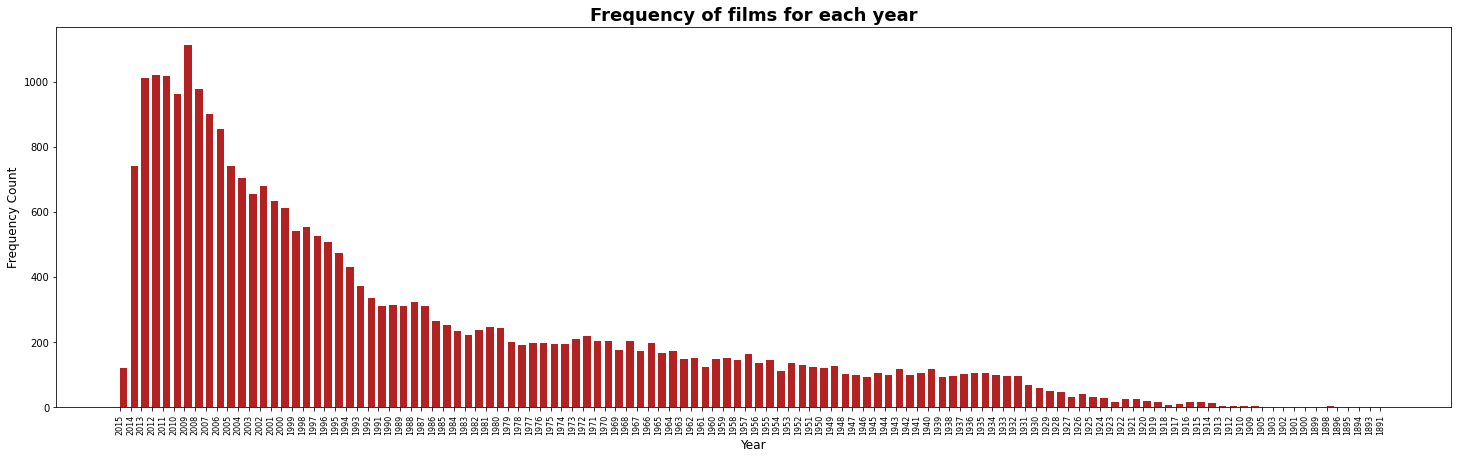

In [106]:
# plotting the encoded year columns
plt.figure(figsize=(25,7))

plt.bar(year_encoded_index, year_encoded_values, color='firebrick', width=0.7, align='edge')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Frequency Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title("Frequency of films for each year", fontsize=18, fontweight=800)

plt.show()

The distribution for the number of films over the years seems reasonable based on the film industry boom in the last 30 years. There seems to be a steady number of films included from the 1950s to early 1970s with a sharp incline in the early 1990s. The MovieLens 20M dataset, which was the base for this table, was released in April of 2015, so it makes sense that there is a drop off from 2014 to 2015.

### 4.1.3 `genres`

For the transformation of the genres column, we first need to split the row data based on the special character. This will create a list of genres that we can then pull out unique values and use that list of unique values to effectively brute force one-hot encode new columns for each unique genre.

In [107]:
# splitting by the character | to make turn the fields into a list
movies_df['genres'] = movies_df['genres'].str.split("|")

In [108]:
# sanity check for list of genres
movies_df['genres']

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
27273                                             [Comedy]
27274                                             [Comedy]
27275                                          [Adventure]
27276                                 [(no genres listed)]
27277                         [Adventure, Fantasy, Horror]
Name: genres, Length: 27278, dtype: object

Now that we have the fields in list format, we can go through each row and find unique values.

In [109]:
# initializing empty list
genre_list = []

# pulling out a list of unique genre values 
for i, genres in enumerate(movies_df['genres']):
    # for each genre in the list in row at index i
    for genre in movies_df['genres'][i]:
        # check if the genre is in the list
        if genre in genre_list:
            # if it is, then ignore
            pass
        # if it is not, then add it to the genre list
        else:
            genre_list.append(genre)
            
genre_list

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 '(no genres listed)']

Now that we have that list, we will create a new column for each unique value. We can then go through each list in each row, adding a value of 1 underneath the appropriate column at the appropriate row, to denote that the movie does include that "feature".

In [110]:
# initializing columns in dataframe for the genres
for genre in genre_list:
    movies_df[genre] = 0

In [111]:
# looping through the specific column
for i, genres in enumerate(movies_df['genres']):
    # looping through the list in the row
    for genre in genres:
        # if the list element in a predetermined list
        if genre in genre_list:
            # fill the field at that column and index location with 1
            movies_df[genre][i] = 1
        # if the list element is not in the list
        else:
            # then do nothing
            pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
movies_df.head()

,movieId,title,genres,year_of_release,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,[Comedy],1995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There seems to be a column for the null values in the genres called "(no genres listed)". Since this will not be helpful in judging similarities between films, we will be dropping this column.

In [113]:
# dropping the column (no genres listed)
movies_df.drop('(no genres listed)', axis=1, inplace=True)

In [115]:
genres_index = movies_df.drop(columns=['movieId', 'title', 'genres', 'year_of_release']).sum().sort_values(ascending=False).index
genres_values = movies_df.drop(columns=['movieId', 'title', 'genres', 'year_of_release']).sum().sort_values(ascending=False).values

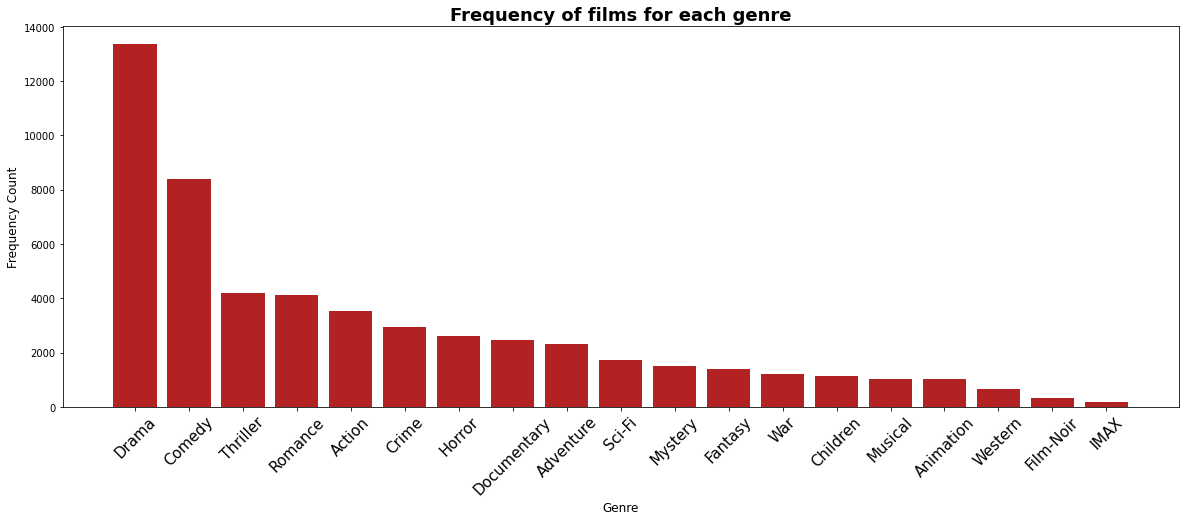

In [116]:
plt.figure(figsize=(20,7))

plt.bar(genres_index, genres_values, color='firebrick')
plt.xticks(rotation=45, fontsize=15)
plt.ylabel('Frequency Count', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.title("Frequency of films for each genre", fontsize=18, fontweight=800)

plt.show()

Most of the genres have a relatively even representation in the dataset, besides the Film-Noir and IMAX genres which are much lower than the average and the Comedy and Drama genres which are much higher than the average. The most shocking of all of this is how much of a jump there is in frequency of the Drama column, it is an unexpected level of popularity.

### 4.1.4 Merging Transformations with Original Dataframe

We will be using the `movies_df` as a base for the movie-feature utility matrix. Since the genres are already encoded into this dataframe, we will be adding the one-hot encoded years to it and dropping the original columns of `genres` and `year_of_release`.

In [117]:
# concatenating the two dataframe together
movies_df = pd.concat([movies_df, year_encoded_df], axis=1)

In [118]:
# dropping columns
movies_df.drop(columns=(['genres', 'year_of_release']), axis=1, inplace=True)

In [120]:
# sanity check
movies_df

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1905,1909,1910,1912,1913,1914,1915,1916,...,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,Toy Story,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27274,131256,"Feuer, Eis & Dosenbier",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,131258,The Pirates,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
27276,131260,Rentun Ruusu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.1.5 Formation of Utility Matrix

In [121]:
# creating the utility matrix
movies_utility = movies_df.copy()

In [122]:
# dropping the title since we already have the movieId
# we can source the title from the movieId if need be
movies_utility.drop(columns=('title'), axis=1, inplace=True)

In [124]:
# for safekeeping
movies_utility.to_csv('/content/movies_utility.csv')

## 4.2 Tags

The next table that we will tackle is the Tags dataset. The tags are user produced, which means there will be some that are very similar but techically counted as different unique values because of minor formatting differences. There will have to be some level of pre-processing done before these can be added to the movies feature utility matrix.

In [125]:
tags_df

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


The dataset has 465,548 rows and 4 columns (userId, movieId, tag, timestamp). The only columns that we are concerned about are the `movieId` and `tag` columns. 

### 4.2.1 Checking unique `tags`

First, as a base starting point, we want to know how many unique values already exist in the `tags` column. This way we can judge how effective our changes in formatting are for reducing the number of different tags.

In [126]:
print(tags_df['tag'].nunique())

38643


As a starting point, we have 38,643 unqiue values (tags).

In [127]:
unique_tags = list(tags_df['tag'].unique())
unique_tags

['Mark Waters',
 'dark hero',
 'noir thriller',
 'bollywood',
 'screwball comedy',
 'mars',
 'neo-noir',
 'jesus',
 'dragon',
 'conspiracy theory',
 'treasure',
 'stranded',
 'Oscar (Best Foreign Language Film)',
 'New Zealand',
 'surreal',
 'unusual',
 'cute',
 'emotional',
 'girls who play boys',
 'Stephen Chow',
 'animation',
 'beautiful',
 'characters',
 'Disney',
 'feminist',
 'Ice',
 'music',
 'musical',
 'pacing',
 'royalty',
 'siblings',
 'storyline',
 'themes',
 'unnecessary villain',
 'voice acting',
 'writing',
 'dark comedy',
 'drugs',
 'Nudity (Full Frontal - Notable)',
 'Nudity (Full Frontal)',
 'Christopher Guest',
 'comedy',
 'music business',
 'rock and roll',
 'satire',
 'witty',
 'Nudity (Topless - Notable)',
 'Nudity (Topless)',
 'sexuality',
 'teen comedy',
 'College Humor',
 'R',
 'Ryan Reynolds',
 'Teen movie',
 'college',
 'Seann William Scott',
 'Vince Vaughn',
 'Will Ferrell',
 'Funniest Movies',
 'hilarious',
 'One of the worst movies of all time',
 'seen mor

### 4.2.2 Normalizing case setting

The first step we will take is to normalize the case setting for all of the tags. We can see in the list above that having an actor's name be capitalized in one tag and not in another are counted as two separate tags. To deal with this, we will write a for loop that goes through each string and makes every character lowercase. We will then re-insert that array of tags back into the dataframe.

In [128]:
tag_list = np.array(tags_df['tag'])

In [129]:
# normalizing case setting
for i, tag in enumerate(tag_list):
    tag_list[i] = tag_list[i].lower()

In [130]:
# re-inserting the array of normalized tags into the column
tags_df['tag'] = tag_list

In [131]:
# sanity check
tags_df['tag']

0           mark waters
1             dark hero
2             dark hero
3         noir thriller
4             dark hero
              ...      
465559          dragged
465560    jason bateman
465561           quirky
465562              sad
465563    rise to power
Name: tag, Length: 465548, dtype: object

In [132]:
# checking to see number of tags after case setting normalization
tags_df['tag'].nunique()

35172

Normalizing the case setting has removed 3,471 of the unique values. At this point, we will need to further condense the tags before they are one hot encoded. We will be creating a dictionary with the unique tags, and counting how many times that tag shows up in the dataframe. We will then create a list of tags that appear infrequently in the dataset. The rows with these tags will then be dropped and that final dataset will be one hot encoded.

### 4.2.3 Condensing Tags

In [133]:
# creation of a list of unique tags
unique_tags = list(tags_df['tag'].unique())

In [134]:
# creation of a dictionary to count the tags
tags_count = {}

# looping through the list of unique tags
for tag in unique_tags:
  # initializing the key in the dictionary for that tag
    tags_count[tag] = 0

In [135]:
# looping through the column tags (saved as an array tag_list)
for tag in tag_list:
  # adding one to the value at each key 
    tags_count[tag] += 1

In [136]:
sorted(tags_count.values(), reverse=True)

[3576,
 3307,
 3169,
 3078,
 3068,
 2646,
 2528,
 2367,
 2334,
 2253,
 2034,
 2015,
 1971,
 1944,
 1910,
 1874,
 1850,
 1763,
 1572,
 1524,
 1511,
 1439,
 1424,
 1422,
 1374,
 1361,
 1352,
 1345,
 1336,
 1312,
 1292,
 1272,
 1224,
 1211,
 1208,
 1199,
 1177,
 1157,
 1118,
 1103,
 1093,
 1090,
 1088,
 1081,
 1073,
 1051,
 1049,
 1038,
 1027,
 1022,
 1000,
 998,
 991,
 985,
 968,
 966,
 950,
 943,
 927,
 916,
 910,
 909,
 904,
 896,
 888,
 872,
 870,
 858,
 848,
 845,
 844,
 842,
 836,
 830,
 827,
 824,
 812,
 802,
 802,
 800,
 794,
 781,
 781,
 777,
 768,
 756,
 746,
 733,
 730,
 730,
 717,
 715,
 706,
 690,
 688,
 682,
 660,
 658,
 653,
 649,
 648,
 645,
 645,
 641,
 628,
 621,
 612,
 610,
 607,
 598,
 597,
 591,
 583,
 576,
 575,
 570,
 570,
 565,
 565,
 565,
 562,
 560,
 556,
 539,
 537,
 537,
 534,
 528,
 527,
 527,
 527,
 523,
 517,
 516,
 514,
 509,
 507,
 502,
 500,
 496,
 487,
 484,
 482,
 480,
 480,
 480,
 479,
 479,
 477,
 475,
 475,
 474,
 474,
 471,
 467,
 463,
 459,
 458,
 

We can see that there are a significant amount of tags that only appear a few hundred times. The choice of a threshold at this point is an arbitrary decision that is only used for condensing the number of columns in our final utility matrix. Ideally we would be able to include more, but setting a threshold at tags that appear less than 150 times gives a reasonable number of "tags" to be one-hot encoded.

In [137]:
# initializing the list for the tags that appear less than 150 times
tags_under_150 = []

# looping through the tag count dictionary
for key, value in tags_count.items():
    # if the tag count is less than 150
    if value < 150:
      # add that tag to the list
       tags_under_150.append(key)

In [138]:
len(tags_under_150)

34589

There are 34,589 tags that appear less than 150 times in the dataset, leaving us with 583 unique tags to be one hot encoded and added as features into our matrix. This seems like a much more reasonable number than ~35,000 features. 

We will now drop all of the rows that have tags that we do not want to have included.

In [139]:
tags_df.head()

,userId,movieId,tag,timestamp
0,18,4141,mark waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [140]:
for i, tag in enumerate(tags_under_150):
    print(f'on {i} of {len(tags_under_150)}')
    tags_df.drop(tags_df[tags_df['tag'] == tag].index, inplace=True)

Streaming output truncated to the last 5000 lines.
on 29589 of 34589
on 29590 of 34589
on 29591 of 34589
on 29592 of 34589
on 29593 of 34589
on 29594 of 34589
on 29595 of 34589
on 29596 of 34589
on 29597 of 34589
on 29598 of 34589
on 29599 of 34589
on 29600 of 34589
on 29601 of 34589
on 29602 of 34589
on 29603 of 34589
on 29604 of 34589
on 29605 of 34589
on 29606 of 34589
on 29607 of 34589
on 29608 of 34589
on 29609 of 34589
on 29610 of 34589
on 29611 of 34589
on 29612 of 34589
on 29613 of 34589
on 29614 of 34589
on 29615 of 34589
on 29616 of 34589
on 29617 of 34589
on 29618 of 34589
on 29619 of 34589
on 29620 of 34589
on 29621 of 34589
on 29622 of 34589
on 29623 of 34589
on 29624 of 34589
on 29625 of 34589
on 29626 of 34589
on 29627 of 34589
on 29628 of 34589
on 29629 of 34589
on 29630 of 34589
on 29631 of 34589
on 29632 of 34589
on 29633 of 34589
on 29634 of 34589
on 29635 of 34589
on 29636 of 34589
on 29637 of 34589
on 29638 of 34589
on 29639 of 34589
on 29640 of 34589
on 29641 of 3

In [141]:
tags_df.to_csv('/content/tags_condensed_df.csv')

### 4.2.4 Encoding tags

Now that we have only the rows we want to be included, we can use the One Hot Encoder to vectorize the columns.

In [ ]:
tags_df = pd.read_csv('/content/tags_condensed_df.csv')

In [142]:
tags_df.shape

(261840, 4)

In [143]:
ohe_tag = OneHotEncoder()

# OneHotEncoder expects a 2D array, so we first convert the column into a DataFrame
vector_tag_df = pd.DataFrame(tags_df['tag'])

# then the encoder is fit & transformed to the tag_df column
tags_encoded = ohe_tag.fit_transform(vector_tag_df)

In [144]:
# change from sparse matrix to dense array
dense_array_tags = tags_encoded.toarray()

In [145]:
# Put into a dataframe to get column names
tags_encoded_df = pd.DataFrame(dense_array_tags, columns=ohe_tag.categories_[0], dtype=int)

In [146]:
tags_encoded_df.shape

(261840, 583)

There are 261,840 rows in this vectorized dataframe, with 583 unique columns (tags).

In [147]:
tags_encoded_df['in netflix queue']

0         0
1         0
2         0
3         0
4         0
         ..
261835    0
261836    0
261837    0
261838    0
261839    0
Name: in netflix queue, Length: 261840, dtype: int64

There appears to be a tag called "in netflix queue". This is probably due to the fact that the data has been collected from [1996](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) and netflix didn't move fully online until 2007. Since this tag wouldn't give any information as to what kind of movie it is or whether or not a user would like the movie because it is a dated reference, we will be dropping this column.

In [148]:
tags_encoded_df.drop(columns='in netflix queue', inplace=True)

In [149]:
tags_values = tags_encoded_df.sum().sort_values(ascending=False).values
tags_index = tags_encoded_df.sum().sort_values(ascending=False).index

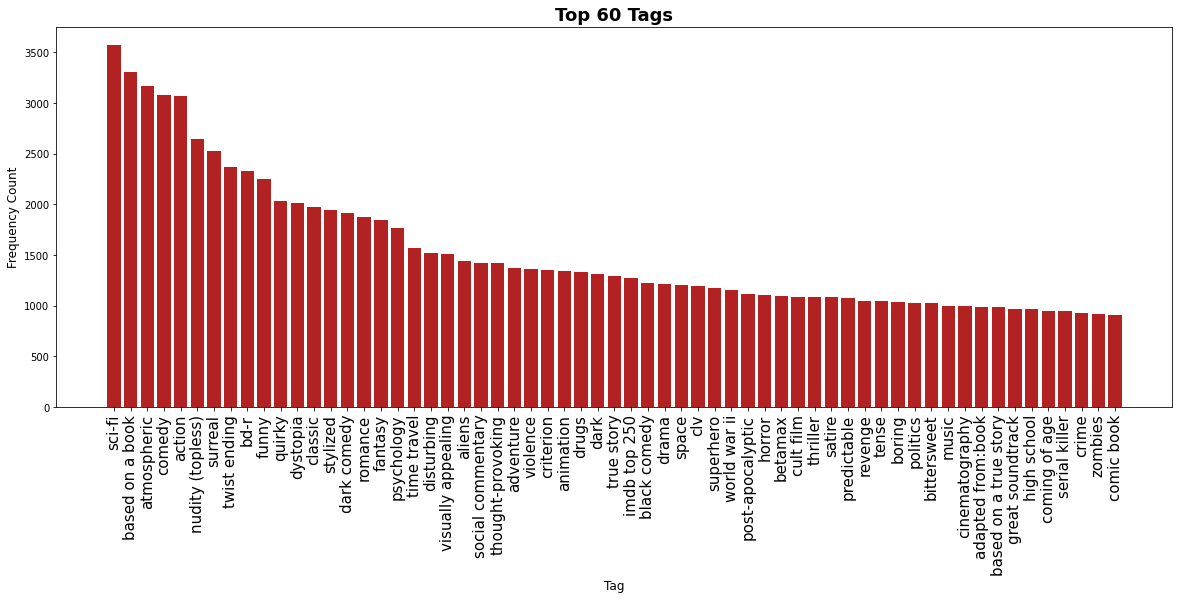

In [150]:
plt.figure(figsize=(20,7))
plt.bar(tags_index[:61], tags_values[:61], color='firebrick')
plt.ylabel('Frequency Count', fontsize=12)
plt.xlabel('Tag', fontsize=12)
plt.xticks(rotation=90, fontsize=15)
plt.title('Top 60 Tags', fontsize=18, fontweight=800)
plt.show()

There are a few tags whose meanings aren't obvious from just reading, but for the most part they seem to be reasonable as well as attributes that would set movies apart from one another. There also seems to still be repeats, with "based on a book" and "adapted from: book" both being in the top 60.

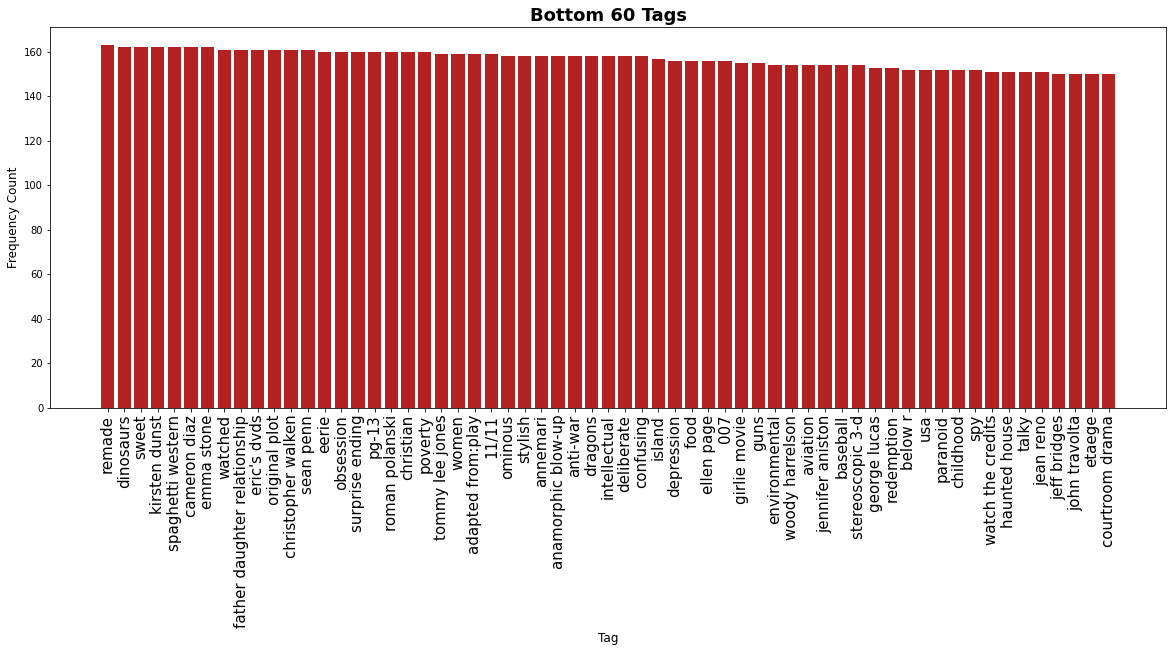

In [151]:
plt.figure(figsize=(20,7))
plt.bar(tags_index[-61:], tags_values[-61:], color='firebrick')
plt.ylabel('Frequency Count', fontsize=12)
plt.xlabel('Tag', fontsize=12)
plt.xticks(rotation=90, fontsize=15)
plt.title('Bottom 60 Tags', fontsize=18, fontweight=800)
plt.show()

It looks like there are also popular actors and actresses included in the tags. This means that we will probably not have to includes the `knownforTitles`, because it might just lead to more repeats that we will eventually have to deal with. As a step further in the next level of the project, it might be something to look into.

Now the encoded tags are ready to be added into the movie feature utility matrix.

### 4.2.5 Merging encoded tags with the Movie ID

For some movies, there are more than one tag, so the merging of this matrix back with the movie utility matrix will not be a one step process. First we will have to join the one-hot encoded dataframe and the original `tags_df` together, to get the movieIds. Then we will join that dataframe back to the original `movie_utilty` dataframe, making sure to do a left join so the index of the first table will be kept intact. This means we will end up with null values for movies that do not have any tags associated with them, but we can fill those will 0's after. The rows will then have to be grouped together by the movie Ids with the data of tags present preserved along the columns.

In [152]:
tags_df.reset_index(drop=True, inplace=True)

In [153]:
# merging the ohe encoded tags with the movie Id column
tags_tomerge_df = pd.concat([tags_df['movieId'], tags_encoded_df], axis=1)
tags_tomerge_df

,movieId,007,01/11,02/11,03/11,05/11,06/11,11/10,11/11,1960s,1970s,1980s,19th century,3d,70mm,acting,action,adam sandler,adapted from:book,adapted from:comic,adapted from:play,addiction,adultery,adventure,afi 100,africa,akira kurosawa,al pacino,alan rickman,alfred hitchcock,alien invasion,aliens,alternate reality,amnesia,anamorphic blow-up,androids,angelina jolie,animals,animated,animation,...,trains,treasure,true story,tumey's dvds,twist ending,twists & turns,uma thurman,underrated,understated,unique,unrealistic,usa,vampire,vampires,vhs,vietnam war,vigilante,violence,violent,virtual reality,visceral,visually appealing,visually stunning,war,watch the credits,watched,weird,wes anderson,western,whimsical,will ferrell,will smith,witty,women,woody allen,woody harrelson,world war ii,writers,zombies,zooey deschanel
0,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261835,3489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261836,3489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261837,7164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261838,55999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
# bringing the utility matrix back in
movies_utility = pd.read_csv('/content/movies_utility.csv')
movies_utility.drop('Unnamed: 0', axis=1, inplace=True)

In [157]:
# joining dataframes on the movieId 
movies_utility = pd.merge(movies_utility, tags_tomerge_df, on='movieId', how='left')
movies_utility

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1905,1909,1910,1912,1913,1914,1915,1916,1917,...,trains,treasure,true story,tumey's dvds,twist ending,twists & turns,uma thurman,underrated,understated,unique,unrealistic,usa,vampire,vampires,vhs,vietnam war,vigilante,violence,violent,virtual reality,visceral,visually appealing,visually stunning,war,watch the credits,watched,weird,wes anderson,western,whimsical,will ferrell,will smith,witty,women,woody allen,woody harrelson,world war ii,writers,zombies,zooey deschanel
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273602,131254,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273603,131256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273604,131258,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273605,131260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# filling the Nan values with 0
movies_utility = movies_utility.fillna(0)

To preserve the fields that have the 1 in them, without creating duplicates, we will aggregate the groupings with the max function, which will always be 1.

In [159]:
# squishing back down to one movieId per row
movies_utility = movies_utility.groupby('movieId').aggregate(func='max')
movies_utility

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1905,1909,1910,1912,1913,1914,1915,1916,1917,1918,...,trains,treasure,true story,tumey's dvds,twist ending,twists & turns,uma thurman,underrated,understated,unique,unrealistic,usa,vampire,vampires,vhs,vietnam war,vigilante,violence,violent,virtual reality,visceral,visually appealing,visually stunning,war,watch the credits,watched,weird,wes anderson,western,whimsical,will ferrell,will smith,witty,women,woody allen,woody harrelson,world war ii,writers,zombies,zooey deschanel
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131254,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131258,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
# checking shape and datatype
print(movies_utility.shape)
movies_utility.info()

(27278, 719)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 1 to 131262
Columns: 719 entries, Adventure to zooey deschanel
dtypes: float64(582), int64(137)
memory usage: 149.8 MB


In [161]:
# changing all float columns back to integer
for column in (list(movies_utility.select_dtypes('float').columns)):
    movies_utility[column] = movies_utility[column].astype('int')

In [162]:
# sanity check
movies_utility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 1 to 131262
Columns: 719 entries, Adventure to zooey deschanel
dtypes: int64(719)
memory usage: 149.8 MB


In [163]:
# final feature utility matrix
movies_utility.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1905,1909,1910,1912,1913,1914,1915,1916,1917,1918,...,trains,treasure,true story,tumey's dvds,twist ending,twists & turns,uma thurman,underrated,understated,unique,unrealistic,usa,vampire,vampires,vhs,vietnam war,vigilante,violence,violent,virtual reality,visceral,visually appealing,visually stunning,war,watch the credits,watched,weird,wes anderson,western,whimsical,will ferrell,will smith,witty,women,woody allen,woody harrelson,world war ii,writers,zombies,zooey deschanel
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now that all of the MovieLens information has been vectorized into the `movies_utility` dataframe, we can move on the IMDB information.

In [164]:
# for safekeeping
movies_utility.to_csv('movies_utility.csv')

# 5. Vectorization of IMDB Dataframes

To remind ourselves of the datasets we are working with:

In [15]:
# reading in dataframes
imdb_features = pd.read_csv('/content/imdb_features.csv', index_col=0)
imdb_names = pd.read_csv('/content/imdb_names.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
imdb_features.head()

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes,directors,writers
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141,nm0924920,nm0238900
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284,nm0617588,"nm0617588,nm1340310"
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206,nm0617588,"nm0617588,nm0894523,nm0257866"
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971,nm0617588,"nm0182945,nm9551905"
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625,nm0846879,nm0846879


For the IMDB Features table, we are most interested in vectorizing the `directors`, `writers` and the `titleType`. The column `isAdult` is already in a binary format, so this will not need to be formatted.

In [17]:
imdb_names.head()

,nconst,primaryName,knownForTitles
0,nm0000001,Fred Astaire,"tt0053137,tt0031983,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,"tt0117057,tt0071877,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,"tt0054452,tt0057345,tt0056404,tt0049189"
3,nm0000004,John Belushi,"tt0080455,tt0077975,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,"tt0069467,tt0050976,tt0050986,tt0060827"


In [18]:
imdb_names.shape

(10827583, 3)

### 5.1 `directors` & `writers`

First, we will be dealing with the directors column. We will be splitting the strings on the comma to turn them into lists so they are more easier to deal with. We will end up dealing with them in a similar way to how we dealt with the tags column earlier on. 

In [19]:
# splitting directors column
imdb_features['directors'] = imdb_features['directors'].str.split(",")

In [20]:
# splitting writers column
imdb_features['writers'] = imdb_features['writers'].str.split(',')

Using similar code as above with the tags, we will be getting a list of unique names in the directors column.

In [21]:
name_list = []

# for names in the lists within each field, add them to the list if they do not exist
for i, name in enumerate(imdb_features['directors']):
    for name in imdb_features['directors'][i]:
        if name in name_list:
            pass
        else:
            name_list.append(name)

name_list

['nm0924920',
 'nm0617588',
 'nm0846879',
 'nm0300487',
 'nm0000428',
 'nm0205986',
 'nm0088881',
 'nm0309130',
 'nm0655824',
 'nm0078205',
 'nm0209738',
 'nm0130633',
 'nm0443857',
 'nm0803705',
 'nm0275421',
 'nm0063612',
 'nm0753233',
 'nm0917467',
 'nm0875869',
 'nm0143333',
 'nm0734958',
 'nm0665163',
 'nm0635667',
 'nm0456804',
 'nm0784407',
 'nm0629589',
 'nm0000122',
 'nm0237713',
 'nm0159725',
 'nm0531759',
 'nm0916665',
 'nm0193327',
 'nm0061955',
 'nm0349785',
 'nm0309163',
 'nm0533289',
 'nm0631438',
 'nm0376529',
 'nm0002177',
 'nm0001124',
 'nm0071658',
 'nm0002031',
 'nm0950148',
 'nm0172413',
 'nm0408436',
 'nm0054977',
 'nm0288616',
 'nm0909825',
 'nm0000779',
 'nm0665737',
 'nm0539718',
 'nm0713787',
 'nm0922304',
 'nm0366689',
 'nm0250445',
 'nm0402489',
 'nm0936767',
 'nm0291387',
 'nm0291548',
 'nm0245385',
 'nm0807742',
 'nm0842521',
 'nm0366586',
 'nm0256221',
 'nm0408937',
 'nm0911959',
 'nm0694260',
 'nm0698839',
 'nm0077928',
 'nm0925118',
 'nm0806565',
 'nm00

In [22]:
len(name_list)

24592

There are 24,592 unique directors in the IMDB table. We will be doing the same thing with the writers column, but since some people are both directors and writers, we will be appending unique names to the same list as before to avoid duplicates.

In [23]:
writers_column = np.array(imdb_features['writers'])

for i, names in enumerate(writers_column):
  print(f'{i} out of {len(writers_column)}')
  for name in writers_column[i]:
      if name in name_list:
          pass
      else:
          name_list.append(name)

Streaming output truncated to the last 5000 lines.
50052 out of 55052
50053 out of 55052
50054 out of 55052
50055 out of 55052
50056 out of 55052
50057 out of 55052
50058 out of 55052
50059 out of 55052
50060 out of 55052
50061 out of 55052
50062 out of 55052
50063 out of 55052
50064 out of 55052
50065 out of 55052
50066 out of 55052
50067 out of 55052
50068 out of 55052
50069 out of 55052
50070 out of 55052
50071 out of 55052
50072 out of 55052
50073 out of 55052
50074 out of 55052
50075 out of 55052
50076 out of 55052
50077 out of 55052
50078 out of 55052
50079 out of 55052
50080 out of 55052
50081 out of 55052
50082 out of 55052
50083 out of 55052
50084 out of 55052
50085 out of 55052
50086 out of 55052
50087 out of 55052
50088 out of 55052
50089 out of 55052
50090 out of 55052
50091 out of 55052
50092 out of 55052
50093 out of 55052
50094 out of 55052
50095 out of 55052
50096 out of 55052
50097 out of 55052
50098 out of 55052
50099 out of 55052
50100 out of 55052
50101 out of 55052

In [24]:
len(name_list)

60606

There are now approximately 60,000 names in our list of names. To count how many times each name appears in the dataset, we will create a dictionary with the name as the key and a count as the value. We can then sort this dictionary by the value to find out the spread of the frequency of the names. We will count the frequency of the names in both the directors and the writers columns.

In [25]:
# creation of a dictionary to count the name
names_count = {}

# looping through the list of unique name
for name in name_list:
  # initializing the key in the dictionary for that name
    names_count[name] = 0

In [26]:
directors_column = np.array(imdb_features['directors'])

# looping through the directors column
for i, names in enumerate(directors_column):
    print(f'{i} out of {len(directors_column)}')
    for name in directors_column[i]:
        # adding one to the value at each key 
        names_count[name] += 1

Streaming output truncated to the last 5000 lines.
50052 out of 55052
50053 out of 55052
50054 out of 55052
50055 out of 55052
50056 out of 55052
50057 out of 55052
50058 out of 55052
50059 out of 55052
50060 out of 55052
50061 out of 55052
50062 out of 55052
50063 out of 55052
50064 out of 55052
50065 out of 55052
50066 out of 55052
50067 out of 55052
50068 out of 55052
50069 out of 55052
50070 out of 55052
50071 out of 55052
50072 out of 55052
50073 out of 55052
50074 out of 55052
50075 out of 55052
50076 out of 55052
50077 out of 55052
50078 out of 55052
50079 out of 55052
50080 out of 55052
50081 out of 55052
50082 out of 55052
50083 out of 55052
50084 out of 55052
50085 out of 55052
50086 out of 55052
50087 out of 55052
50088 out of 55052
50089 out of 55052
50090 out of 55052
50091 out of 55052
50092 out of 55052
50093 out of 55052
50094 out of 55052
50095 out of 55052
50096 out of 55052
50097 out of 55052
50098 out of 55052
50099 out of 55052
50100 out of 55052
50101 out of 55052

In [27]:
# looping through the writers column
for i, name in enumerate(writers_column):
    for name in writers_column[i]:
    # adding one to the value at each key
        names_count[name] += 1

In [28]:
sorted(names_count.values(), reverse=True)

[2542,
 123,
 112,
 106,
 104,
 102,
 99,
 86,
 84,
 83,
 83,
 82,
 82,
 81,
 78,
 74,
 74,
 73,
 72,
 71,
 70,
 70,
 70,
 69,
 67,
 67,
 67,
 67,
 66,
 65,
 65,
 65,
 64,
 64,
 64,
 63,
 63,
 63,
 63,
 63,
 62,
 62,
 62,
 61,
 60,
 60,
 60,
 60,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 56,
 56,
 55,
 55,
 55,
 55,
 55,
 54,
 54,
 54,
 54,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 52,
 52,
 52,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 46,
 46,
 46,
 46,
 46,
 46,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39

In [29]:
len(names_count.keys())

60606

There are 60,606 names, which is a sizeable amount of columns to be vectorized, so we will have to do some trimming at this point. Again, we are choosing an arbitrary threshold that is set to remove infrequent names as well as keeping the number of columns to be vectorized at a reasonable level.

In [30]:
# initializing the list for the names that appear more than 40 times
names_over_40 = []

# looping through the name count dictionary
for key, value in names_count.items():
    # if the name count is less than 40
    if value > 40:
      # add that name to the list
       names_over_40.append(key)

In [31]:
len(names_over_40)

179

Choosing to include names that only appear more than 40 times leaves us with 179 names, or 179 columns to be vectorized. This seems more appropriate. We will also be removing the name that appears the most, which actually turns out to be the null value "\\N".

In [32]:
# removing the Null value
names_over_40.remove("\\N")

In [33]:
# sanity check
len(names_over_40)

178

Now the columns are ready for vectorization.

### 5.2 Creation of Feature Matrix

In [35]:
# reading back in the feature matrix
imdb_features_matrix = pd.read_csv('/content/imdb_features.csv', index_col=0)

In [36]:
imdb_features_matrix

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes,directors,writers
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141,nm0924920,nm0238900
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284,nm0617588,"nm0617588,nm1340310"
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206,nm0617588,"nm0617588,nm0894523,nm0257866"
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971,nm0617588,"nm0182945,nm9551905"
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625,nm0846879,nm0846879
...,...,...,...,...,...,...,...,...,...,...,...
55047,8804284,movie,American Dharma,0,2018,95,193271,7.0,722,nm0001554,\N
55048,8816130,movie,Reshenie o likvidatsii,0,2018,96,192795,5.4,188,nm0033240,nm10036092
55049,8837018,movie,Manta Ray,0,2018,105,193273,6.7,797,nm2306874,nm2306874
55050,8846862,movie,Your Face,0,2018,76,193277,7.0,207,nm0158857,\N


First, we will create columns in the dataframe for each of the names in the list we determined previously in 4.1. The columns will be initialized with a 0, then the counts added on.

In [38]:
# setting up the columns
for name in names_over_40:
    imdb_features_matrix[name] = 0

For each row in the dataframe, we will go through the lists and match the column header name id that appears in that row with a 1, indicating that that person was involved in that film.

In [39]:
# for each row in the directors column
for i, names in enumerate(imdb_features_matrix['directors']):
    # for each name in the list
    for name in names:
        # if the name appears in the list names_over_40
        if name in names_over_40:
            # go to that column at the index, set it 1
            imdb_features_matrix[name][i] = 1
        # if it doesn't exist in the list, leave it
        else:
            pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
# same as above but for the writers column
for i, names in enumerate(imdb_features_matrix['writers']):
    for name in names:
        if name in names_over_40:
            imdb_features_matrix[name][i] = 1
        else:
            pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
imdb_features_matrix.head()

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes,directors,writers,nm0000428,nm0000122,nm0002031,nm0909825,nm0000036,nm0000406,nm0523932,nm0502752,nm0000485,nm0166836,nm0547966,nm0454771,nm0719756,nm0896542,nm0064415,nm0000033,nm0245213,nm0920074,nm0001008,nm0226189,nm0001328,nm0886754,nm0503777,nm0215877,nm0861703,nm0045800,nm0000320,nm0654868,nm0368871,...,nm0007139,nm0001054,nm0001053,nm0000455,nm0691061,nm0000175,nm0000490,nm0939147,nm0393254,nm0586281,nm0346096,nm1104118,nm1347153,nm0000636,nm0000590,nm0236279,nm0342278,nm0342303,nm0829044,nm0933133,nm0081788,nm0750822,nm0122446,nm0536941,nm0002042,nm0873707,nm0258493,nm0448839,nm0948634,nm0147599,nm0795975,nm0796950,nm0176420,nm0024589,nm0139536,nm0004170,nm0393250,nm0332417,nm0456158,nm0498278
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141,[nm0924920],[nm0238900],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284,[nm0617588],"[nm0617588, nm1340310]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206,[nm0617588],"[nm0617588, nm0894523, nm0257866]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971,[nm0617588],"[nm0182945, nm9551905]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625,[nm0846879],[nm0846879],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now that the columns have been added successfully, we can match the `nconst` id to the actual name of the person involved.

In [45]:
# for safekeeping
imdb_features_matrix.to_csv('imdb_features_matrix.csv')

### 5.3 Merging Names with nconst

For merging the names, we will need to have a list of the `nconst` ids that are involved. For this we will create a new list with the columns that are in the matrix, we will then create a dictionary that matches the key - `nconst` with the value - `primaryName`. We can then use these key-value pairs to match up to the column headers.

In [46]:
imdb_names.head()

,nconst,primaryName,knownForTitles
0,nm0000001,Fred Astaire,"tt0053137,tt0031983,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,"tt0117057,tt0071877,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,"tt0054452,tt0057345,tt0056404,tt0049189"
3,nm0000004,John Belushi,"tt0080455,tt0077975,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,"tt0069467,tt0050976,tt0050986,tt0060827"


In [47]:
# pulling the names list
names_columns_list = list(imdb_features_matrix.columns)[11:]

In [48]:
# initializing dictionary
names_dictionary = {}

# for each name in the list
for name in names_columns_list:
    # use the nconst as key and the value is the primaryName at that location in the names df
    names_dictionary[name] = str(imdb_names[imdb_names['nconst'] == name].iloc[:,1].values)

In [49]:
names_dictionary

{'nm0000005': "['Ingmar Bergman']",
 'nm0000019': "['Federico Fellini']",
 'nm0000033': "['Alfred Hitchcock']",
 'nm0000036': "['Buster Keaton']",
 'nm0000041': "['Akira Kurosawa']",
 'nm0000076': "['François Truffaut']",
 'nm0000080': "['Orson Welles']",
 'nm0000095': "['Woody Allen']",
 'nm0000108': "['Luc Besson']",
 'nm0000118': "['John Carpenter']",
 'nm0000122': "['Charles Chaplin']",
 'nm0000127': "['Wes Craven']",
 'nm0000175': "['Stephen King']",
 'nm0000217': "['Martin Scorsese']",
 'nm0000229': "['Steven Spielberg']",
 'nm0000231': "['Oliver Stone']",
 'nm0000265': "['Robert Altman']",
 'nm0000320': "['Luis Buñuel']",
 'nm0000338': "['Francis Ford Coppola']",
 'nm0000339': "['Roger Corman']",
 'nm0000361': "['Brian De Palma']",
 'nm0000406': "['John Ford']",
 'nm0000419': "['Jean-Luc Godard']",
 'nm0000428': "['D.W. Griffith']",
 'nm0000455': "['John Hughes']",
 'nm0000485': "['Fritz Lang']",
 'nm0000490': "['Spike Lee']",
 'nm0000581': "['Joseph L. Mankiewicz']",
 'nm000059

Now that we have the dictionary, we can match up and rename the columns in the features matrix.

In [50]:
%%time
for nconst, name in names_dictionary.items():
    imdb_features_matrix.rename(columns={nconst : name}, inplace=True)

CPU times: user 71.5 ms, sys: 4.08 ms, total: 75.6 ms
Wall time: 71 ms


In [51]:
imdb_features_matrix.head()

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes,directors,writers,['D.W. Griffith'],['Charles Chaplin'],['Michael Curtiz'],['Raoul Walsh'],['Buster Keaton'],['John Ford'],['Ernst Lubitsch'],['Robert Z. Leonard'],['Fritz Lang'],['Edward F. Cline'],['Frances Marion'],['Henry King'],['Jean Renoir'],['King Vidor'],['William Beaudine'],['Alfred Hitchcock'],['Julien Duvivier'],['William A. Wellman'],['Frank Capra'],['William Dieterle'],['Howard Hawks'],['W.S. Van Dyke'],['Mervyn LeRoy'],['Roy Del Ruth'],['Richard Thorpe'],['Lloyd Bacon'],['Luis Buñuel'],['Yasujirô Ozu'],['Henry Hathaway'],...,['Hark Tsui'],['Joel Coen'],['Ethan Coen'],['John Hughes'],['Jim Wynorski'],['Stephen King'],['Spike Lee'],['Jing Wong'],['Sang-soo Hong'],['Takashi Miike'],['Tonino Guerra'],['Kim Ki-duk'],['Tyler Perry'],['William Shakespeare'],['Edgar Allan Poe'],['Arthur Conan Doyle'],['Jacob Grimm'],['Wilhelm Grimm'],['Robert Louis Stevenson'],['Carey Wilson'],['Earl Derr Biggers'],['Harry Ruskin'],['W.R. Burnett'],['John Lee Mahin'],['Charles Dickens'],['Lamar Trotti'],['Julius J. Epstein'],['Robert E. Kent'],['Philip Yordan'],"[""Suso Cecchi D'Amico""]",['Joe Shuster'],['Jerry Siegel'],['Sandro Continenza'],['Mario Amendola'],['Tito Carpi'],['Bob Kane'],['Kuang Ni'],['Dardano Sacchetti'],['Jack Kirby'],['Stan Lee']
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141,[nm0924920],[nm0238900],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284,[nm0617588],"[nm0617588, nm1340310]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206,[nm0617588],"[nm0617588, nm0894523, nm0257866]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971,[nm0617588],"[nm0182945, nm9551905]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625,[nm0846879],[nm0846879],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The unsightly formatting of the brackets and commas will have to be removed, so we can use the str.strip() function and a regex expression to strip those characters off of both sides.

In [53]:
imdb_features_matrix.columns = (imdb_features_matrix.columns).str.strip(to_strip=r"[\W']")

In [54]:
imdb_features_matrix.head()

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes,directors,writers,D.W. Griffith,Charles Chaplin,Michael Curtiz,Raoul Walsh,Buster Keaton,John Ford,Ernst Lubitsch,Robert Z. Leonard,Fritz Lang,Edward F. Cline,Frances Marion,Henry King,Jean Renoir,King Vidor,illiam Beaudine,Alfred Hitchcock,Julien Duvivier,illiam A. Wellman,Frank Capra,illiam Dieterle,Howard Hawks,.S. Van Dyke,Mervyn LeRoy,Roy Del Ruth,Richard Thorpe,Lloyd Bacon,Luis Buñuel,Yasujirô Ozu,Henry Hathaway,...,Hark Tsui,Joel Coen,Ethan Coen,John Hughes,Jim Wynorski,Stephen King,Spike Lee,Jing Wong,Sang-soo Hong,Takashi Miike,Tonino Guerra,Kim Ki-duk,Tyler Perry,illiam Shakespeare,Edgar Allan Poe,Arthur Conan Doyle,Jacob Grimm,ilhelm Grimm,Robert Louis Stevenson,Carey Wilson,Earl Derr Biggers,Harry Ruskin,.R. Burnett,John Lee Mahin,Charles Dickens,Lamar Trotti,Julius J. Epstein,Robert E. Kent,Philip Yordan,"""Suso Cecchi D'Amico""",Joe Shuster,Jerry Siegel,Sandro Continenza,Mario Amendola,Tito Carpi,Bob Kane,Kuang Ni,Dardano Sacchetti,Jack Kirby,Stan Lee
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141,[nm0924920],[nm0238900],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284,[nm0617588],"[nm0617588, nm1340310]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206,[nm0617588],"[nm0617588, nm0894523, nm0257866]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971,[nm0617588],"[nm0182945, nm9551905]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625,[nm0846879],[nm0846879],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# sanity check
imdb_features_matrix.shape

(55052, 189)

In [56]:
# for safekeeping
imdb_features_matrix.to_csv('imdb_features_matrix.csv')

### 5.4 `titleType`

Lastly, we will be vectorizing the titleType column using the one-hot encoder.

In [57]:
imdb_features_matrix['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'video'], dtype=object)

In [60]:
ohe_title = OneHotEncoder()

title_type_df = pd.DataFrame(imdb_features_matrix['titleType'])
title_type_encoded = ohe_title.fit_transform(title_type_df)

title_type_dense = title_type_encoded.toarray()
title_type_df = pd.DataFrame(title_type_dense, columns=ohe_title.categories_[0], dtype=int)

In [61]:
title_type_df

,movie,short,tvMovie,video
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
55047,1,0,0,0
55048,1,0,0,0
55049,1,0,0,0
55050,1,0,0,0


In [62]:
title_type_df.sum()

movie      49098
short        860
tvMovie     3518
video       1576
dtype: int64

Since there are so many instances of the titleType movie, it will have to be dropped. This could cause issues with our similarity scores, and it is a bit redundant since we are focusing on movies anyway.

In [63]:
title_type_df.drop('movie', axis=1, inplace=True)
title_type_df.head()

,short,tvMovie,video
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,0


We can now add these columns back into the features matrix.

In [64]:
imdb_features_matrix = pd.concat([imdb_features_matrix, title_type_edf], axis=1)

In [65]:
imdb_features_matrix.head()

,imdbId,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,movieId,averageRating,numVotes,directors,writers,D.W. Griffith,Charles Chaplin,Michael Curtiz,Raoul Walsh,Buster Keaton,John Ford,Ernst Lubitsch,Robert Z. Leonard,Fritz Lang,Edward F. Cline,Frances Marion,Henry King,Jean Renoir,King Vidor,illiam Beaudine,Alfred Hitchcock,Julien Duvivier,illiam A. Wellman,Frank Capra,illiam Dieterle,Howard Hawks,.S. Van Dyke,Mervyn LeRoy,Roy Del Ruth,Richard Thorpe,Lloyd Bacon,Luis Buñuel,Yasujirô Ozu,Henry Hathaway,...,Jim Wynorski,Stephen King,Spike Lee,Jing Wong,Sang-soo Hong,Takashi Miike,Tonino Guerra,Kim Ki-duk,Tyler Perry,illiam Shakespeare,Edgar Allan Poe,Arthur Conan Doyle,Jacob Grimm,ilhelm Grimm,Robert Louis Stevenson,Carey Wilson,Earl Derr Biggers,Harry Ruskin,.R. Burnett,John Lee Mahin,Charles Dickens,Lamar Trotti,Julius J. Epstein,Robert E. Kent,Philip Yordan,"""Suso Cecchi D'Amico""",Joe Shuster,Jerry Siegel,Sandro Continenza,Mario Amendola,Tito Carpi,Bob Kane,Kuang Ni,Dardano Sacchetti,Jack Kirby,Stan Lee,movie,short,tvMovie,video
0,192,short,"Ella Lola, a la Trilby",0,1898,95,94431,4.5,141,[nm0924920],[nm0238900],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,465,short,"Fairyland; or, the Kingdom of the Fairies",0,1903,16,174171,7.3,1284,[nm0617588],"[nm0617588, nm1340310]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,499,short,The Impossible Voyage,0,1904,24,129836,7.6,3206,[nm0617588],"[nm0617588, nm0894523, nm0257866]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,567,short,The 400 Tricks of the Devil,0,1906,17,174179,6.7,971,[nm0617588],"[nm0182945, nm9551905]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,574,movie,The Story of the Kelly Gang,0,1906,70,170573,6.1,625,[nm0846879],[nm0846879],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now that the columns are properly vectorized, we can drop their source columns.

In [66]:
# dropping source columns
columns_to_drop = ['titleType', 'directors', 'writers']
imdb_features_matrix.drop(columns=columns_to_drop, axis=1, inplace=True)

We will also be separating off a few columns into a reference table to be added to the MovieLens reference table.

In [67]:
# creation of the imdb_reference_table
imdb_reference_table = imdb_features_matrix[['primaryTitle', 'startYear', 'movieId', 'averageRating', 'numVotes', 'runtimeMinutes']]

In [68]:
# for safekeeping
imdb_reference_table.to_csv('imdb_reference_table.csv')

We will now drop all of the columns that do not pertain to the final feature matrix, all of the columns that are not in binary format, so that all of the IMDB features can be added to the MovieLens based utility matrix.

In [69]:
imdb_features_matrix = imdb_features_matrix.drop(columns=['imdbId', 'primaryTitle', 'startYear', 'averageRating', 'numVotes', 'runtimeMinutes'], axis=1)

In [71]:
imdb_features_matrix.head()

,isAdult,movieId,D.W. Griffith,Charles Chaplin,Michael Curtiz,Raoul Walsh,Buster Keaton,John Ford,Ernst Lubitsch,Robert Z. Leonard,Fritz Lang,Edward F. Cline,Frances Marion,Henry King,Jean Renoir,King Vidor,illiam Beaudine,Alfred Hitchcock,Julien Duvivier,illiam A. Wellman,Frank Capra,illiam Dieterle,Howard Hawks,.S. Van Dyke,Mervyn LeRoy,Roy Del Ruth,Richard Thorpe,Lloyd Bacon,Luis Buñuel,Yasujirô Ozu,Henry Hathaway,Anatole Litvak,George Cukor,Norman Taurog,Kurt Neumann,Billy Wilder,Gordon Douglas,Orson Welles,Ben Hecht,John Huston,...,Jim Wynorski,Stephen King,Spike Lee,Jing Wong,Sang-soo Hong,Takashi Miike,Tonino Guerra,Kim Ki-duk,Tyler Perry,illiam Shakespeare,Edgar Allan Poe,Arthur Conan Doyle,Jacob Grimm,ilhelm Grimm,Robert Louis Stevenson,Carey Wilson,Earl Derr Biggers,Harry Ruskin,.R. Burnett,John Lee Mahin,Charles Dickens,Lamar Trotti,Julius J. Epstein,Robert E. Kent,Philip Yordan,"""Suso Cecchi D'Amico""",Joe Shuster,Jerry Siegel,Sandro Continenza,Mario Amendola,Tito Carpi,Bob Kane,Kuang Ni,Dardano Sacchetti,Jack Kirby,Stan Lee,movie,short,tvMovie,video
0,0,94431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,174171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,129836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,174179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,170573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now, we will read in the movies_utility matrix and merge the two together.

In [74]:
# reading in the movies_utility matrix
movies_utility = pd.read_csv('movies_utility.csv')

In [75]:
movies_utility.head()

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1905,1909,1910,1912,1913,1914,1915,1916,1917,...,trains,treasure,true story,tumey's dvds,twist ending,twists & turns,uma thurman,underrated,understated,unique,unrealistic,usa,vampire,vampires,vhs,vietnam war,vigilante,violence,violent,virtual reality,visceral,visually appealing,visually stunning,war,watch the credits,watched,weird,wes anderson,western,whimsical,will ferrell,will smith,witty,women,woody allen,woody harrelson,world war ii,writers,zombies,zooey deschanel
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
movies_utility.shape

(27278, 720)

In [80]:
movies_utility = pd.merge(movies_utility, imdb_features_matrix, on='movieId', how='left')

In [81]:
movies_utility.isna().sum()

movieId        0
Adventure      0
Animation      0
Children       0
Comedy         0
            ... 
Stan Lee     806
movie        806
short_y      806
tvMovie      806
video        806
Length: 903, dtype: int64

It looks like there are quite a few columns that have null values after the merge. This just means that these films do not have any values for the features, so these fields will be filled with 0's, to denote that the feature does not exist.

In [82]:
movies_utility.shape

(27278, 903)

In [83]:
# filling null values with 0
movies_utility = movies_utility.fillna(0)

In [84]:
# changing all float columns back to integer
for column in (list(movies_utility.select_dtypes('float').columns)):
    movies_utility[column] = movies_utility[column].astype('int')

In [85]:
movies_utility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 0 to 27277
Columns: 903 entries, movieId to video
dtypes: int64(903)
memory usage: 188.1 MB


In [86]:
# null value sanity check
movies_utility.isna().any().sum()

0

There are no more null values, and the columns are all of the appropriate data types.

In [87]:
movies_utility

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,1891,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1905,1909,1910,1912,1913,1914,1915,1916,1917,...,Jim Wynorski,Stephen King,Spike Lee,Jing Wong,Sang-soo Hong,Takashi Miike,Tonino Guerra,Kim Ki-duk,Tyler Perry,illiam Shakespeare,Edgar Allan Poe,Arthur Conan Doyle,Jacob Grimm,ilhelm Grimm,Robert Louis Stevenson,Carey Wilson,Earl Derr Biggers,Harry Ruskin,.R. Burnett,John Lee Mahin,Charles Dickens,Lamar Trotti,Julius J. Epstein,Robert E. Kent,Philip Yordan,"""Suso Cecchi D'Amico""",Joe Shuster,Jerry Siegel,Sandro Continenza,Mario Amendola,Tito Carpi,Bob Kane,Kuang Ni,Dardano Sacchetti,Jack Kirby,Stan Lee,movie,short_y,tvMovie,video
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27274,131256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27275,131258,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27276,131260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [88]:
# for safekeeping
movies_utility.to_csv('/content/movies_utility.csv')

Now we have a movie-feature utility matrix: `movies_utility`


Ready for modelling.

# 6. Creation of Movie Reference Table

During the recommendations stage, we will need a reference table for creating popularity thresholds or referencing facts about the films. To create this, we will merge the MovieLens reference table and the IMDB reference table that we have created.

In [106]:
movies_reference = pd.read_csv('/content/movies_reference.csv', index_col=0)

In [107]:
movies_reference.head()

,movieId,title,year_of_release
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [108]:
imdb_reference_table.head()

,primaryTitle,startYear,movieId,averageRating,numVotes,runtimeMinutes
0,"Ella Lola, a la Trilby",1898,94431,4.5,141,95
1,"Fairyland; or, the Kingdom of the Fairies",1903,174171,7.3,1284,16
2,The Impossible Voyage,1904,129836,7.6,3206,24
3,The 400 Tricks of the Devil,1906,174179,6.7,971,17
4,The Story of the Kelly Gang,1906,170573,6.1,625,70


In [109]:
movies_reference = pd.merge(movies_reference, imdb_reference_table, on='movieId', how='left')

In [110]:
movies_reference.isna().sum()

movieId              0
title                0
year_of_release      0
primaryTitle       806
startYear          806
averageRating      806
numVotes           806
runtimeMinutes     806
dtype: int64

The `primaryTitle` and `startYear` columns are repeats and they have null values, so they will be dropped.

In [111]:
# dropping columns
movies_reference = movies_reference.drop(columns=['startYear','primaryTitle'])

In [112]:
movies_reference = movies_reference.set_index('movieId')

In [113]:
movies_reference.head()

,title,year_of_release,averageRating,numVotes,runtimeMinutes
movieId,,,,,
1,Toy Story,1995,8.3,896826.0,81.0
2,Jumanji,1995,7.0,312103.0,104.0
3,Grumpier Old Men,1995,6.7,24447.0,101.0
4,Waiting to Exhale,1995,6.0,9671.0,124.0
5,Father of the Bride Part II,1995,6.1,34885.0,106.0


In [114]:
movies_reference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 1 to 131262
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            27278 non-null  object 
 1   year_of_release  27278 non-null  int64  
 2   averageRating    26472 non-null  float64
 3   numVotes         26472 non-null  float64
 4   runtimeMinutes   26472 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ MB


There are still quite a few null values in the columns `averageRating`, `numVotes` and `runtimeMinutes`. Since this table is just for reference, we will be imputing the values with the median values for each.

In [115]:
movies_reference.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,27278.0,1992.607046,162.496909,1891.0,1976.00,1998.0,2008.00,9999.0
averageRating,26472.0,6.445803,1.039394,1.3,5.90,6.6,7.20,9.3
numVotes,26472.0,26344.506006,92241.071633,5.0,1031.75,3122.0,12025.25,2369695.0
runtimeMinutes,26472.0,99.573021,21.745153,15.0,89.00,97.0,109.00,240.0


In [116]:
movies_reference['averageRating'] = movies_reference['averageRating'].fillna(6.6)
movies_reference['numVotes'] = movies_reference['numVotes'].fillna(3122)
movies_reference['runtimeMinutes'] = movies_reference['runtimeMinutes'].fillna(97)

In [117]:
movies_reference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 1 to 131262
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            27278 non-null  object 
 1   year_of_release  27278 non-null  int64  
 2   averageRating    27278 non-null  float64
 3   numVotes         27278 non-null  float64
 4   runtimeMinutes   27278 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ MB


Now that there are no more null values, the table is ready for the next step.

In [118]:
movies_reference.to_csv('movies_reference.csv')

Please continue to notebook 2/4 for model selection.